In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re


# Overwrite ****** matplotlib defaults
import seaborn as sns
import matplotlib.pyplot as plt
cm = 0.393701

plt.rcParams['svg.fonttype']='none'
plt.rcParams['pdf.fonttype']=42
plt.rcParams['font.family'] = 'Arial'

plt.rcParams['figure.dpi'] = '300'

cm = 1/2.54  # centimeters in inches
# allows specifying matplotlib sizes in cm
plt.rcParams['lines.linewidth'] = 0.8
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['figure.figsize'] = [5*cm, 4.5*cm]

plt.rcParams["font.size"] = 6

plt.rcParams['xtick.major.width'] = 0.8
plt.rcParams['xtick.minor.width'] = 0.4
plt.rcParams['ytick.major.width'] = 0.8
plt.rcParams['ytick.minor.width'] = 0.4
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['xtick.minor.size'] = 1
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['ytick.minor.size'] = 1

In [2]:
ms = pd.read_csv("data/report.unique_genes_matrix.tsv", sep="\t")

names = ms.columns
newnames = list()
for name in names:
    name = re.sub(r'G:\\18.8.23_Michal\\', '', name)
    name = re.sub(r'_S1-B.+', '', name)
    newnames.append(name)
    
ms.columns = newnames
ms = ms.dropna()
ms.head()

,Genes,CSSdp12,CSSdp11,CSSdp10,CSSde9,CSSde8,CSSnp6,CSSnp5,CSSnp4,CSSne3,CSSne2,CSSne1,CSSde7
0,A2M,10160.20,13972.60,10169.10,11225.1,9447.17,13268.20,11302.90,13244.70,8142.55,10309.8,6196.12,5910.10
1,AAAS,14175.00,9529.35,10678.30,16869.6,13681.90,15087.20,9175.67,8604.15,16780.80,14398.4,17691.50,13080.20
2,AACS,7000.36,8383.23,8358.35,10330.0,7937.28,5082.58,9166.29,5565.56,14257.20,10865.9,8083.31,8558.94
3,AAGAB,20024.80,20835.40,23175.20,16137.6,22372.90,30716.00,24360.50,27683.00,21867.60,26076.1,19465.30,19172.60
4,AAK1,17678.50,14805.30,15429.70,10430.4,12119.90,14337.80,15661.60,14061.60,12825.40,17398.3,16319.80,14771.40


In [3]:
ms_long = ms.melt(id_vars="Genes", value_name="LFQ_intensity")

sample = list()
for var in ms_long.variable:
    if 'ne' in var:
        sample.append('DMSO')
    elif 'de' in var:
        sample.append('SRRM2_depletion')
    elif 'np' in var:
        sample.append('SON_depletion')
    elif 'dp' in var:
        sample.append('DOUBLE_depletion')
    else:
        print("ERROR!")

ms_long['treatment'] = sample
ms_long.head()

,Genes,variable,LFQ_intensity,treatment
0,A2M,CSSdp12,10160.20,DOUBLE_depletion
1,AAAS,CSSdp12,14175.00,DOUBLE_depletion
2,AACS,CSSdp12,7000.36,DOUBLE_depletion
3,AAGAB,CSSdp12,20024.80,DOUBLE_depletion
4,AAK1,CSSdp12,17678.50,DOUBLE_depletion


/scratch/local/ipykernel_28293/1816499103.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['order'] = tmp.Genes.map(sorterIndex)
/scratch/local/ipykernel_28293/1816499103.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.sort_values('order', inplace=True)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'SON'),
  Text(1, 0, 'SRRM2'),
  Text(2, 0, 'SRSF1'),
  Text(3, 0, 'SRSF2'),
  Text(4, 0, 'SRSF3'),
  Text(5, 0, 'SRSF4'),
  Text(6, 0, 'SRSF5'),
  Text(7, 0, 'SRSF6'),
  Text(8, 0, 'SRSF7'),
  Text(9, 0, 'SRSF8'),
  Text(10, 0, 'SRSF9'),
  Text(11, 0, 'SRSF10'),
  Text(12, 0, 'SRSF11')])

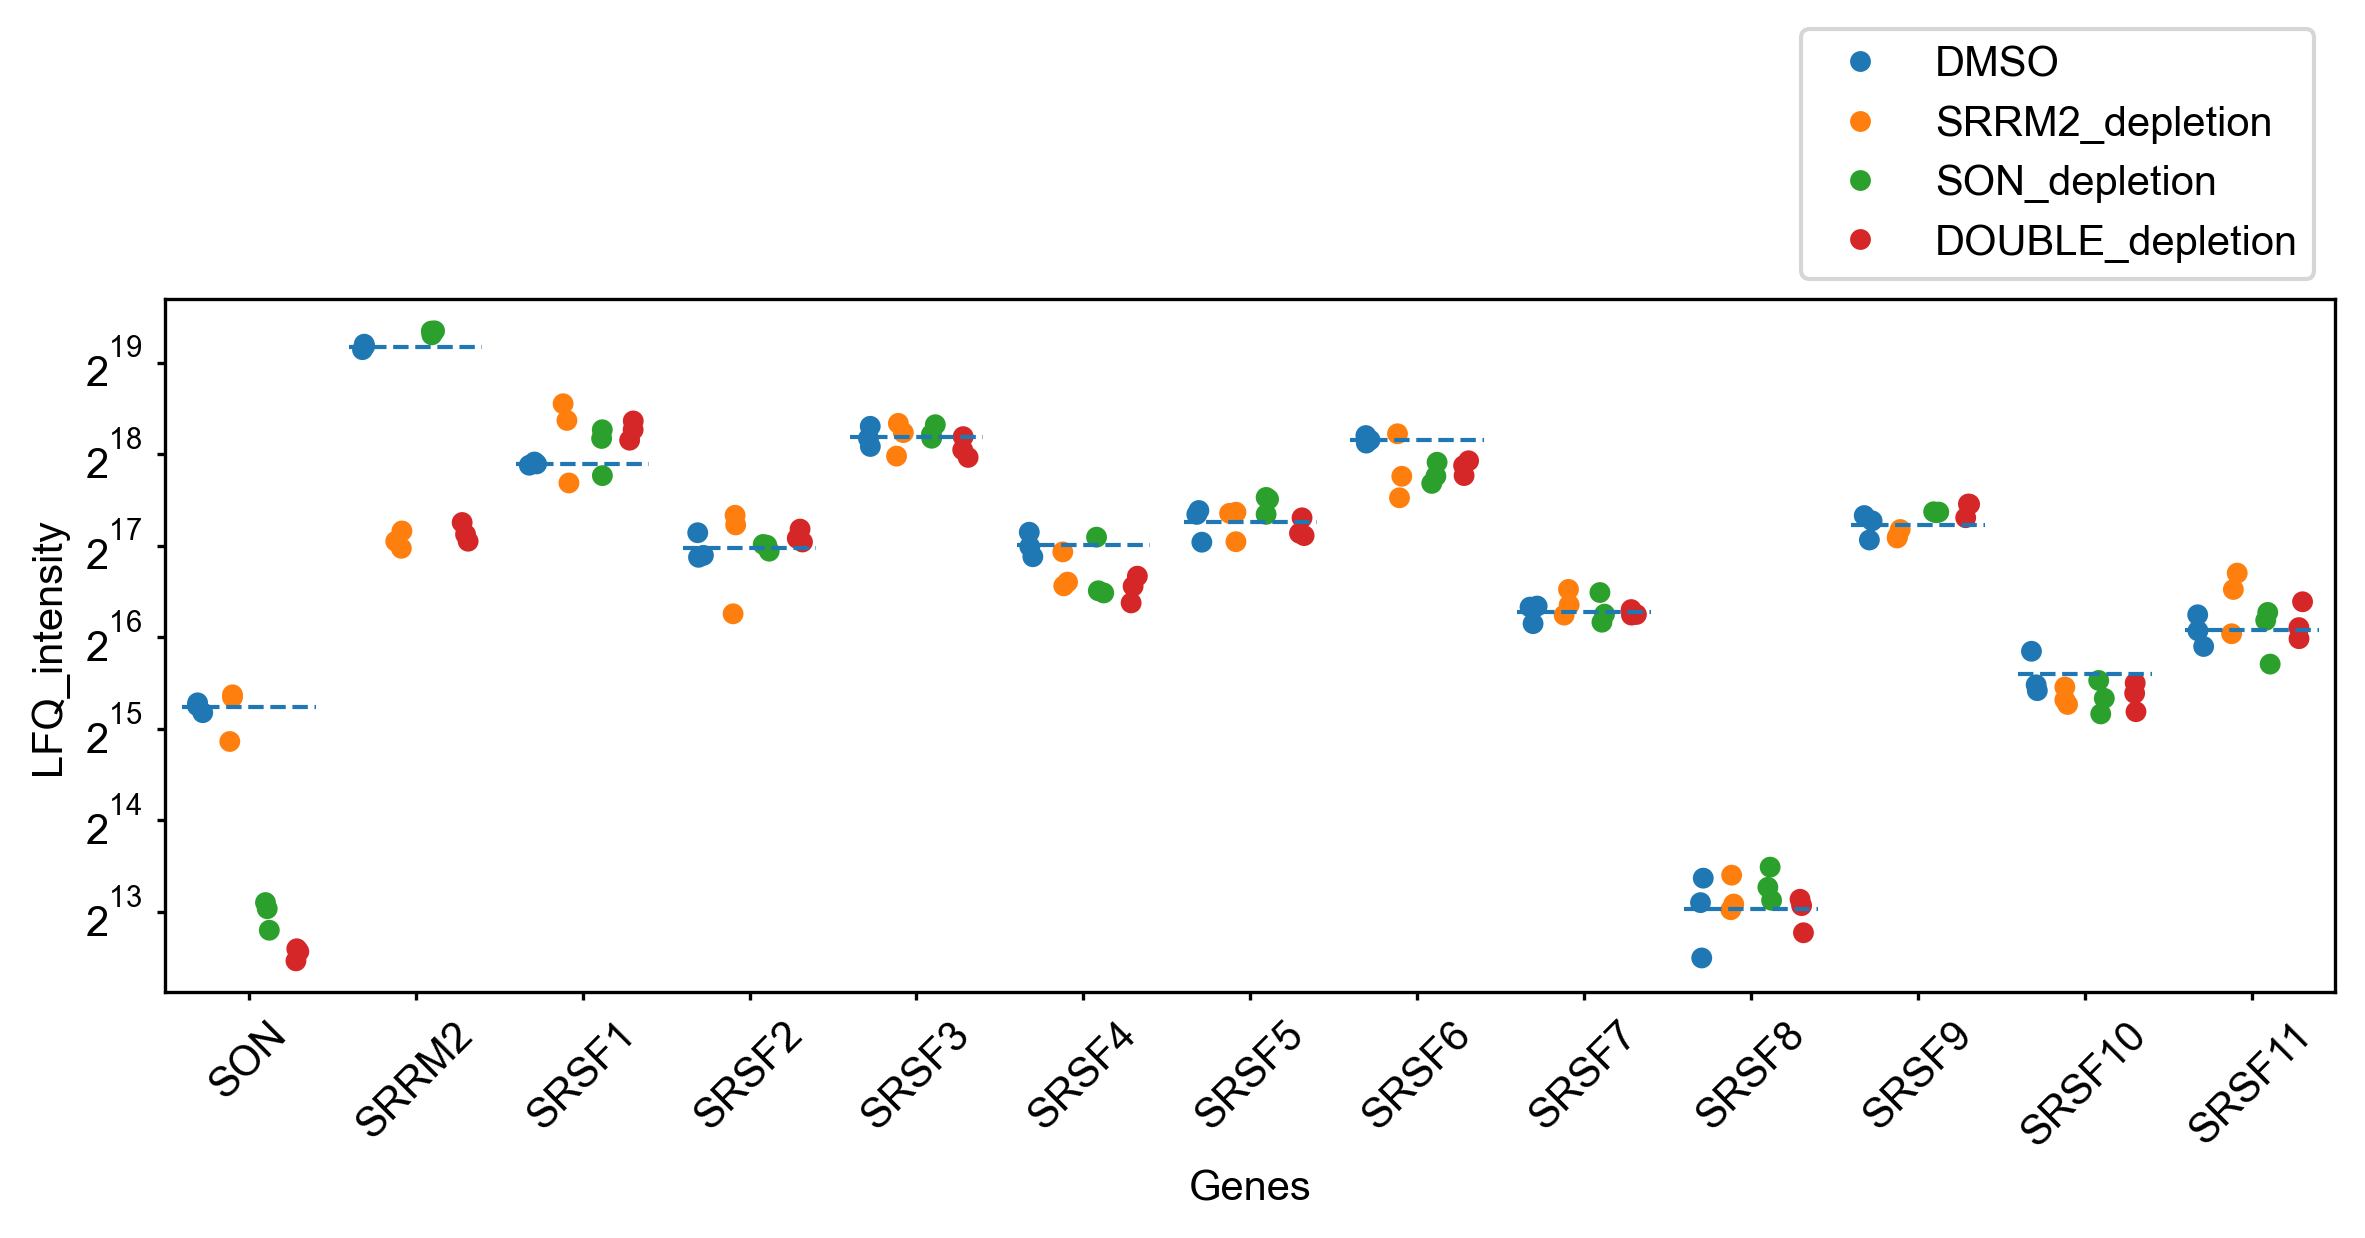

In [4]:
# subsetting the dataframe with proteins to plot
to_plot =   ["SON", "SRRM2"] + \
            ["SRSF" + str(i) for i in range(1,13)] 
          
tmp = ms_long[ms_long['Genes'].isin(to_plot)]

plt.rcParams["font.size"] = 10
figsize=(len(to_plot)/1.5,3)

# reordering the dataframe according to the order in the list above
sorterIndex = dict(zip(to_plot, range(len(to_plot))))
tmp['order'] = tmp.Genes.map(sorterIndex)
tmp.sort_values('order', inplace=True)

# plotting points
plt.figure(figsize=figsize)
g = sns.stripplot(tmp, x="Genes", y="LFQ_intensity", hue="treatment", dodge=True, hue_order=["DMSO", "SRRM2_depletion", "SON_depletion", "DOUBLE_depletion"])

# plotting the mean lines of DMSO control 
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': '#1f77b4', 'ls': '--', 'lw': 1},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="Genes",
            y="LFQ_intensity",
            data=tmp[tmp["treatment"] == "DMSO"],
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=g)
g.set_yscale('log', base=2)
sns.move_legend(g, "lower right",bbox_to_anchor=(1, 1))

plt.xticks(rotation=45)

/scratch/local/ipykernel_28293/2158178208.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['order'] = tmp.Genes.map(sorterIndex)
/scratch/local/ipykernel_28293/2158178208.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.sort_values('order', inplace=True)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'SON'),
  Text(1, 0, 'SRRM2'),
  Text(2, 0, 'SRRM1'),
  Text(3, 0, 'PRPF8'),
  Text(4, 0, 'SF3B1'),
  Text(5, 0, 'SF3A2'),
  Text(6, 0, 'TRA2A'),
  Text(7, 0, 'TRA2B'),
  Text(8, 0, 'U2AF2'),
  Text(9, 0, 'DDX41'),
  Text(10, 0, 'RBM25'),
  Text(11, 0, 'SNRNP70')])

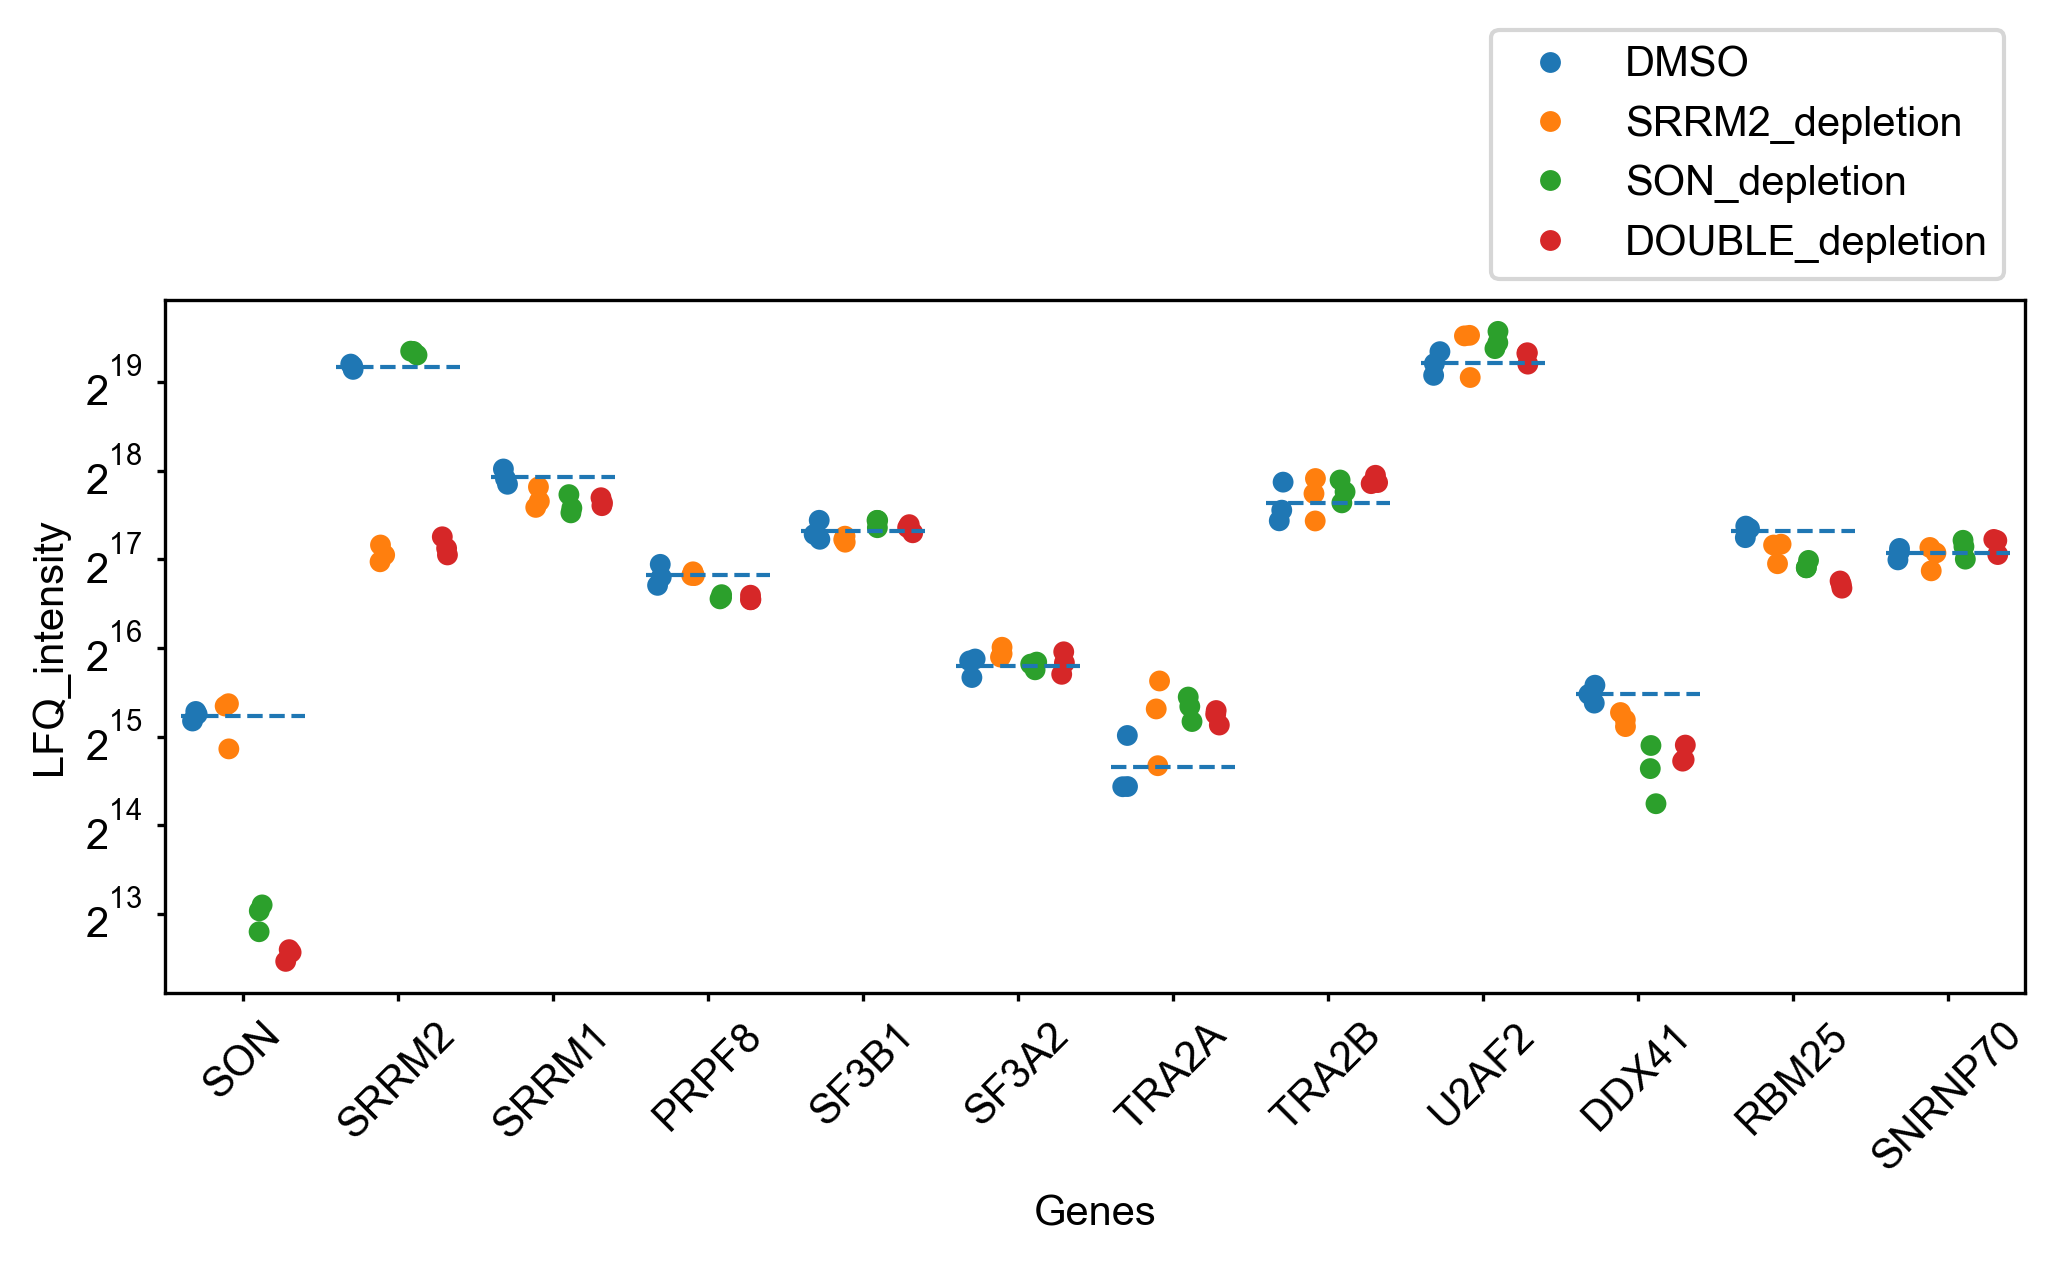

In [5]:
# subsetting the dataframe with proteins to plot
to_plot =   ["SON", "SRRM2", "SRRM1"] + \
            ["PRPF8", "SF3B1", "SF3A2","TRA2A", "TRA2B"] + \
            ["U2AF2", "DDX41", "RBM25", "SNRNP70"]          
tmp = ms_long[ms_long['Genes'].isin(to_plot)]

plt.rcParams["font.size"] = 10
figsize=(len(to_plot)/1.5,3)

# reordering the dataframe according to the order in the list above
sorterIndex = dict(zip(to_plot, range(len(to_plot))))
tmp['order'] = tmp.Genes.map(sorterIndex)
tmp.sort_values('order', inplace=True)

# plotting points
plt.figure(figsize=figsize)
g = sns.stripplot(tmp, x="Genes", y="LFQ_intensity", hue="treatment", dodge=True, hue_order=["DMSO", "SRRM2_depletion", "SON_depletion", "DOUBLE_depletion"])

# plotting the mean lines of DMSO control 
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': '#1f77b4', 'ls': '--', 'lw': 1},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="Genes",
            y="LFQ_intensity",
            data=tmp[tmp["treatment"] == "DMSO"],
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=g)
g.set_yscale('log', base=2)
sns.move_legend(g, "lower right",bbox_to_anchor=(1, 1))

plt.xticks(rotation=45)

/scratch/local/ipykernel_10127/2254842842.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["LFQ_diff"] = tmp["LFQ_intensity"] / [means[x] for x in tmp["Genes"]]
/scratch/local/ipykernel_10127/2254842842.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["LFQ_Log2FC"] = np.log2(tmp["LFQ_diff"])


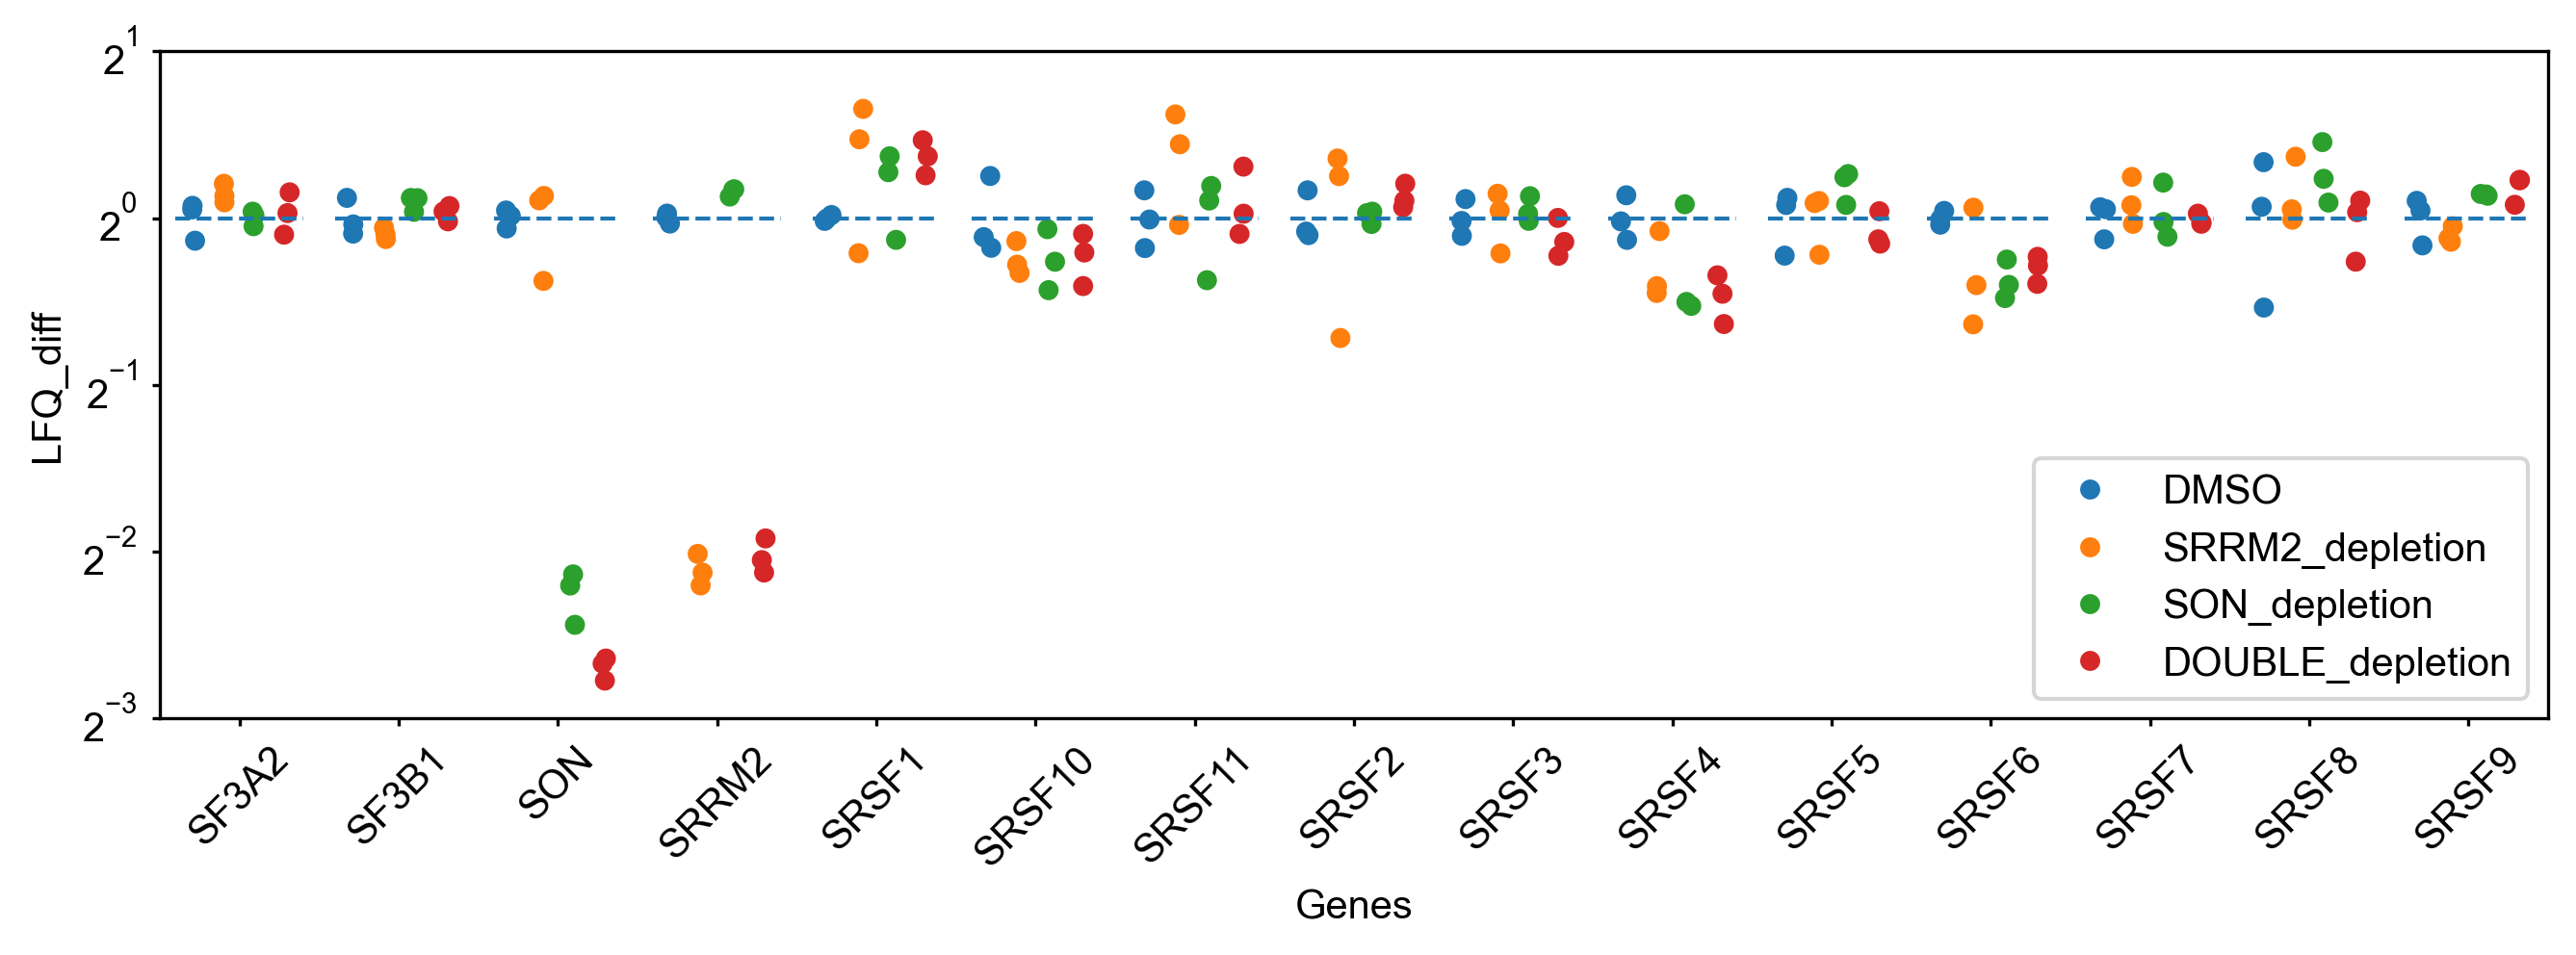

In [34]:
# subsetting the dataframe with proteins to plot
to_plot =   ["SON", "SRRM2"] + \
            ["SRSF" + str(i) for i in range(1,13)] + \
            ["SF3B1", "SF3A2"] 

          
tmp = ms_long[ms_long['Genes'].isin(to_plot)]

plt.rcParams["font.size"] = 10
figsize=(len(to_plot)/1.5,3)

means = tmp[tmp.treatment == "DMSO"].groupby("Genes").LFQ_intensity.mean()

tmp["LFQ_diff"] = tmp["LFQ_intensity"] / [means[x] for x in tmp["Genes"]]
tmp["LFQ_Log2FC"] = np.log2(tmp["LFQ_diff"])

# plotting points
plt.figure(figsize=figsize)
g = sns.stripplot(tmp, x="Genes", y="LFQ_diff", hue="treatment", dodge=True, hue_order=["DMSO", "SRRM2_depletion", "SON_depletion", "DOUBLE_depletion"])
# plotting the mean lines of DMSO control 
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': '#1f77b4', 'ls': '--', 'lw': 1},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="Genes",
            y="LFQ_diff",
            data=tmp[tmp["treatment"] == "DMSO"],
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=g)

g.set_yscale('log', base=2)
g.set_ylim((2**-3, 2**1))
plt.xticks(rotation=45)

## DIAgui results
I ran DIAgui with standard settings to calculate iBAQ values, that allow comparison of the expression levels of different proteins.

Here I'll sanity check the results and re-plot the results using iBAQ instead of LFQ

In [49]:
prot_groups = pd.read_csv("data/diagui/240430_1547_Imputed_diadata.txt", sep="\t")
ms_long = prot_groups[["Genes", 'iBAQ_control_1', 'iBAQ_control_2', 'iBAQ_control_3',
                     'iBAQ_SRRM2-dep_1', 'iBAQ_SRRM2dep_2', 'iBAQ_SRRM2dep_3',
                     'iBAQ_SONdep_1', 'iBAQ_SONdep_2', 'iBAQ_SONdep_3',
                     'iBAQ_DOUBLEdep_1', 'iBAQ_DOUBLEdep_2', 'iBAQ_DOUBLEdep_3'
                     ]]
ms_long = ms_long.melt(id_vars="Genes", value_name="iBAQ")
sample = list()
for var in ms_long.variable:
    if 'control' in var:
        sample.append('DMSO')
    elif 'SRRM2' in var:
        sample.append('SRRM2_depletion')
    elif 'SON' in var:
        sample.append('SON_depletion')
    elif 'DOUBLE' in var:
        sample.append('DOUBLE_depletion')
    else:
        print("ERROR!")

ms_long['treatment'] = sample
ms_long.head()

,Genes,variable,iBAQ,treatment
0,PNMA6F,iBAQ_control_1,2.478613,DMSO
1,CSNKA2IP,iBAQ_control_1,2.944985,DMSO
2,IQCM,iBAQ_control_1,2.191989,DMSO
3,H2BE1,iBAQ_control_1,3.966520,DMSO
4,RBM47,iBAQ_control_1,3.125402,DMSO


In [52]:
control_means = pd.DataFrame(ms_long[ms_long.treatment=="DMSO"].groupby("Genes").describe().iBAQ["mean"])
control_means.head()

,mean
Genes,
A2M,2.871037
AAAS,3.316951
AACS,3.029090
AAGAB,3.617795
AAK1,3.184020


In [53]:
# coloring the selected proteins
to_plot =   ["SON", "SRRM2"] + \
            ["SF3B1", "SF3A2"] 
            
SRs = ["SRSF" + str(i) for i in range(1,13)]

prots_col = list()
for gene in control_means.index:
    if gene in to_plot:
        prots_col.append(gene)
    elif gene in SRs:
        prots_col.append("SR proteins")
    else:
        prots_col.append("other")
        
control_means["selected_genes"] = prots_col
control_means['sel'] = ["all_genes" if x == "other" else "selected genes" for x in control_means["selected_genes"]]
control_means.head()

,mean,selected_genes,sel
Genes,,,
A2M,2.871037,other,all_genes
AAAS,3.316951,other,all_genes
AACS,3.029090,other,all_genes
AAGAB,3.617795,other,all_genes
AAK1,3.184020,other,all_genes


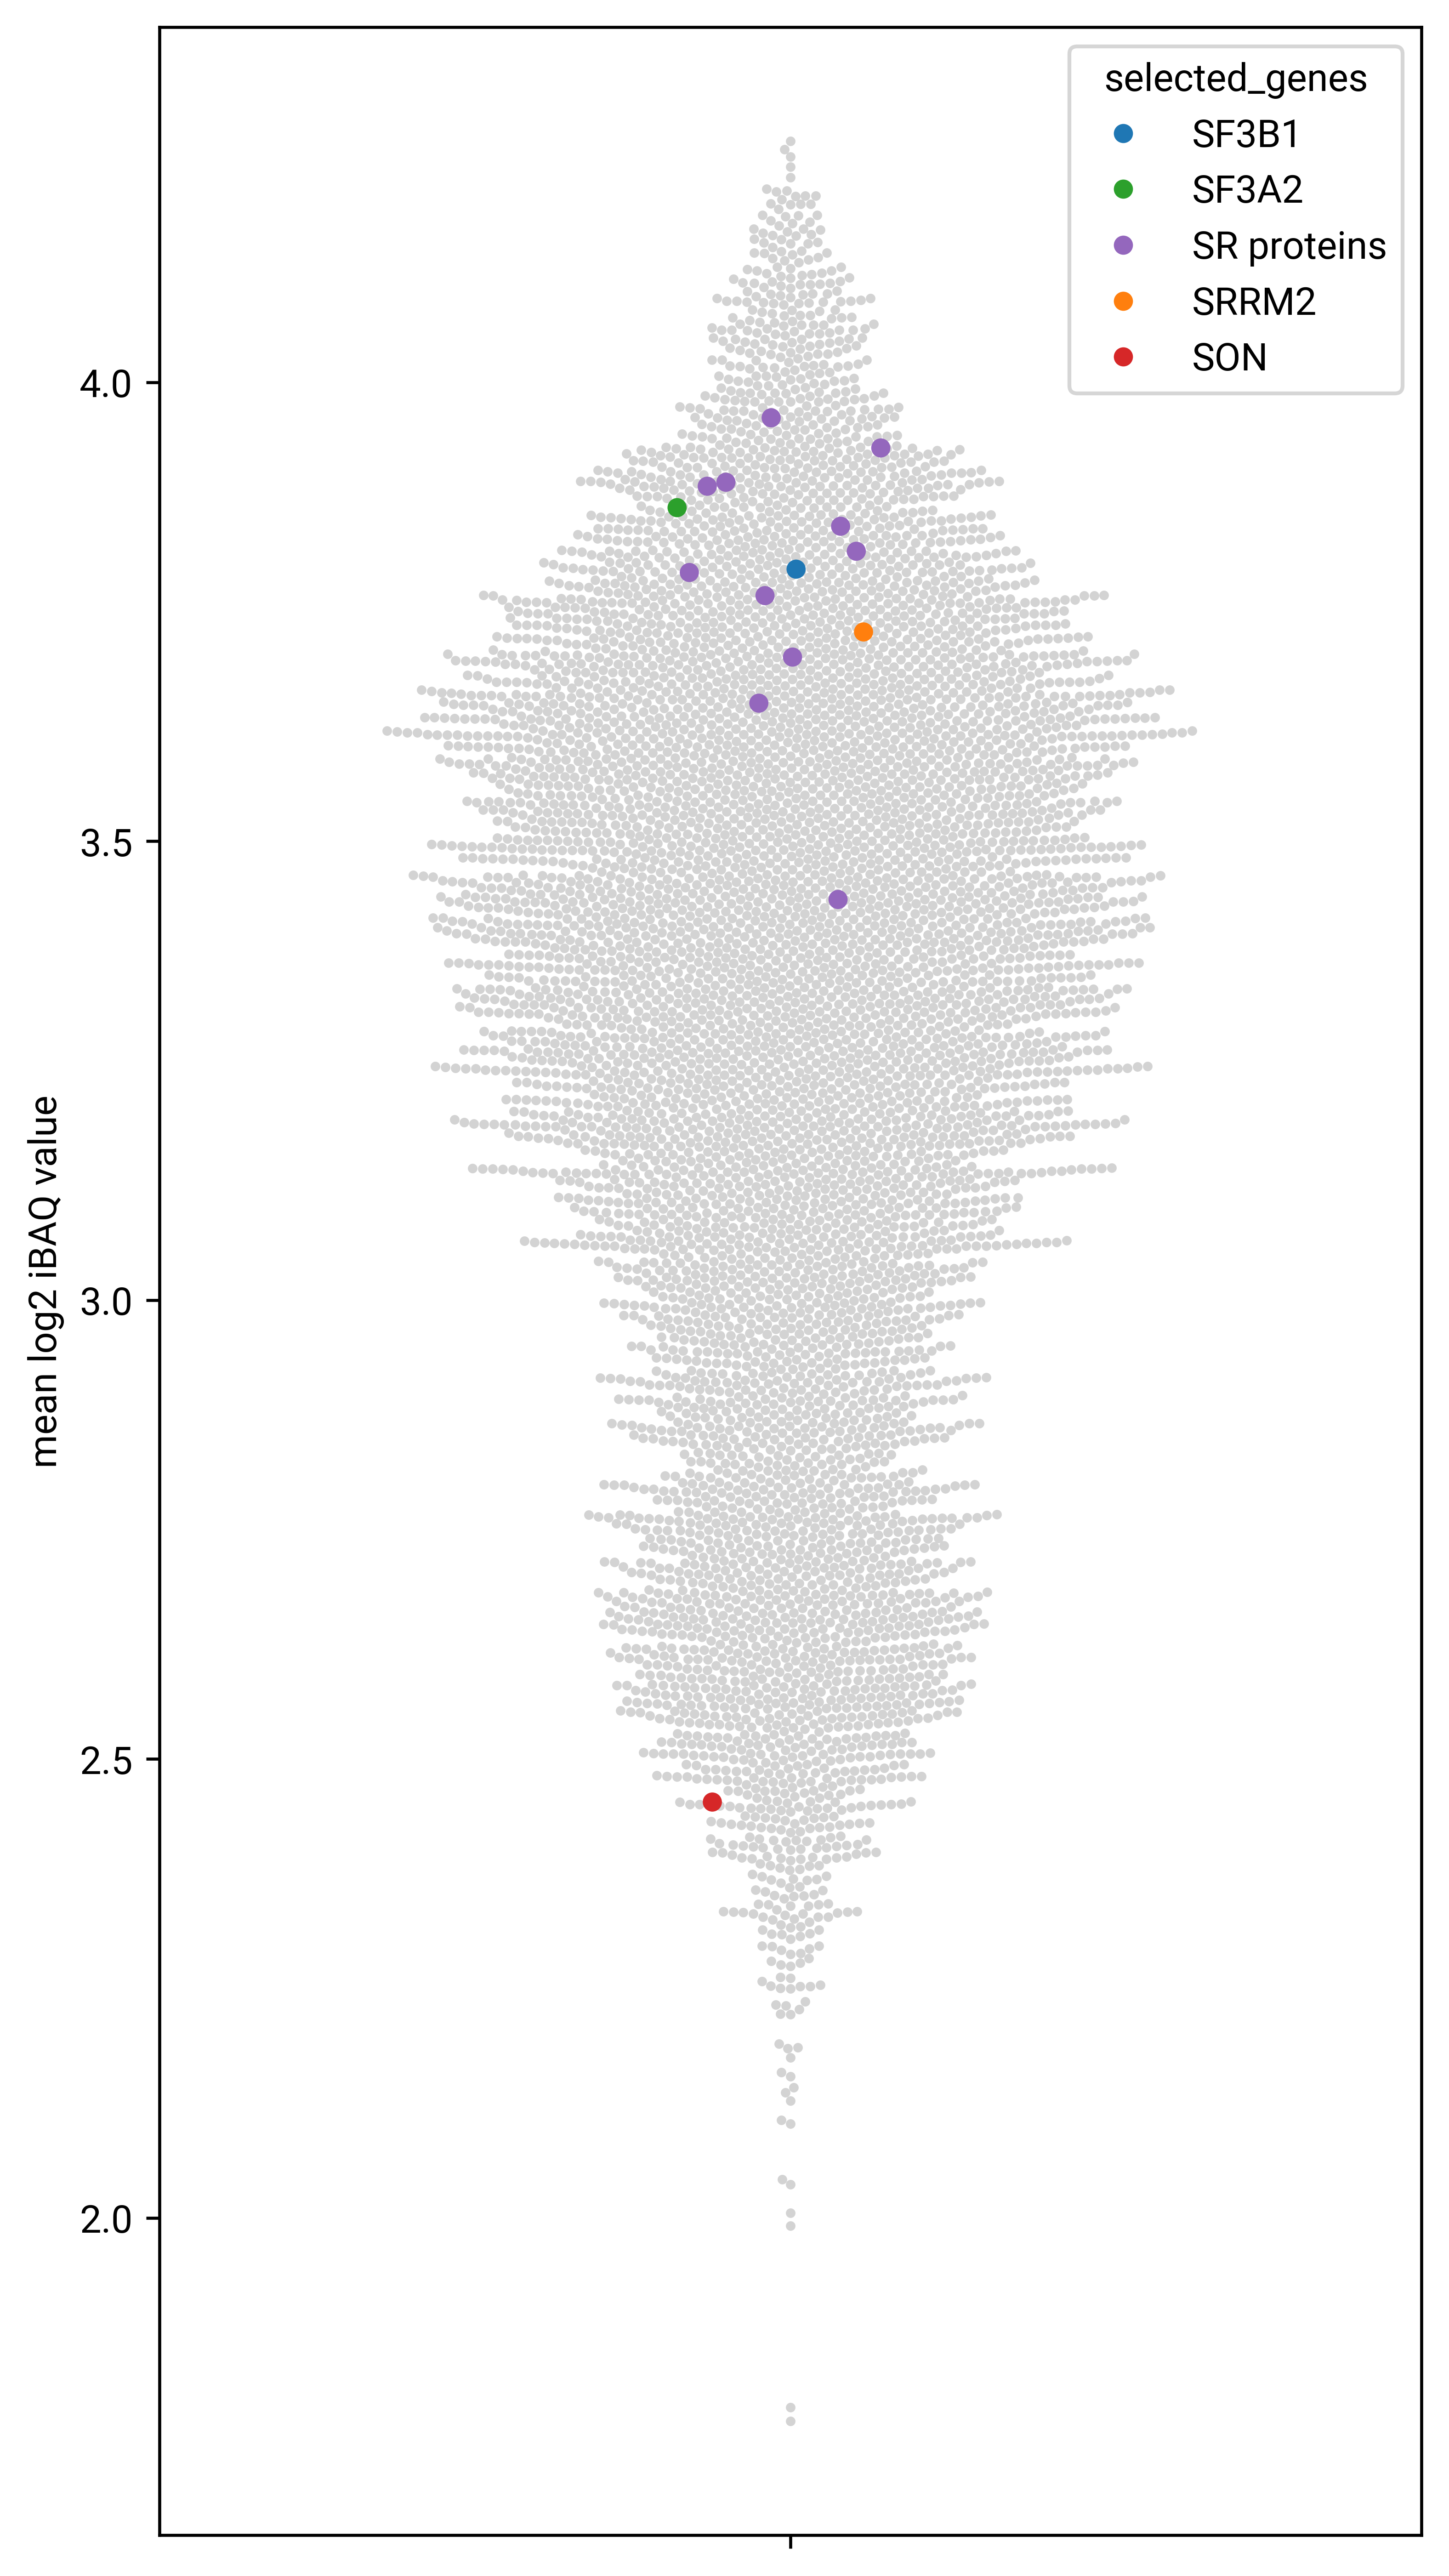

In [164]:
fig,ax = plt.subplots(figsize=(15*cm,30*cm))

l = sns.color_palette()

ax1 = sns.swarmplot(control_means, y="mean", s=2.5, color="lightgrey")

ax2 = sns.stripplot(control_means[control_means["selected_genes"] != "other"], hue="selected_genes", y="mean",
                    hue_order= ["SF3B1", "SF3A2", "SR proteins", "SRRM2", "SON"],
                    palette=[l[0],l[2],l[4],l[1],l[3]],
                    s=5)
sns.move_legend(g, "lower left")
plt.ylabel("mean log2 iBAQ value")
plt.show()